In [443]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
from math import trunc
%matplotlib inline

## Read in transit data for GJ 436 b

In [487]:
tr_data = astropy.io.ascii.read("transit3.txt")

## Calculate the best-fit model

In [488]:
import pylightcurve as plc
# import exotethys 
if True:
    planet = plc.get_planet('gj436b')   ## Use this to get all the data for the star without manually entring everything
    
    planet.mid_time = 2454510.80088
    
    planet.stellar_logg = 4.840763584           # float, in log(cm/s^2)
    
    planet.stellar_temperature = 3586.10656129500  # float, in Kelvin
    
    planet.stellar_metallicity = 0.09908018243005000    # float, in dex(Fe/H) or dex(M/H)
    
    planet.rp_over_rs = 0.0862          # float, no units
    
    time_array = tr_data["HJD"].data

    # Calculate Limb-darkening parameters
    limb_darkening_coefficients = planet.filter('clear').limb_darkening_coefficients  ## New way to gt the coeffs

    flux_array = planet.transit_integrated(time_array, time_format='BJD_TDB', 
                                           exp_time=120, time_stamp = 'mid', filter_name='clear', max_sub_exp_time=1)


PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
Fp/Fs estimated using A=0.15, e=1.0 for filter clear.


## Plot the best-fit model

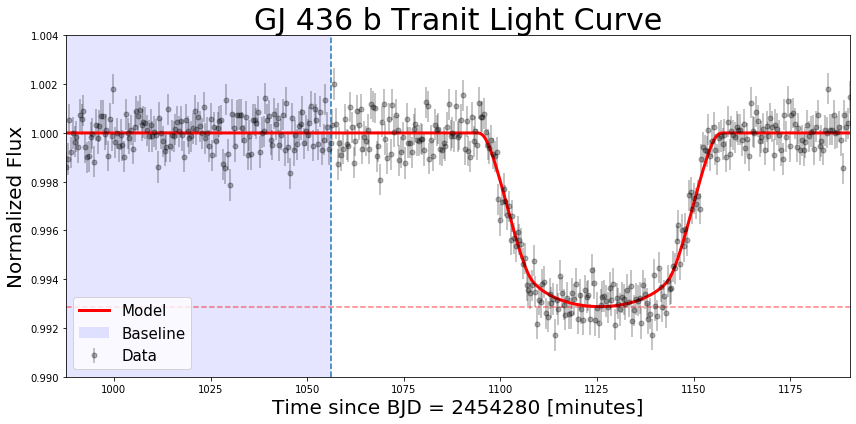

In [503]:
t0=min(time_array)
tDay = 24*60*round(t0 - trunc(t0),7)

fig = plt.figure(figsize=(12,6)) 
plt.errorbar(tDay+(tr_data["HJD"]-min(tr_data["HJD"]))*24*60, tr_data['Relative_Flux'], \
             tr_data["Relative_Flux_Uncertainty"], ms=5, \
             marker="o", ls="none", label="Data", color="black", alpha=0.3)

plt.axvline(tDay+(time_array[150]-min(time_array))*24*60,linestyle = 'dashed')
plt.plot(tDay+(time_array-min(time_array))*24*60, flux_array, 'r-', lw=3, label="Model")
plt.ylim(plt.ylim()[0], plt.ylim()[1])
plt.xlabel('Time since BJD = {} [minutes]'.format(int(t0)), fontsize = 20)
plt.ylabel('Normalized Flux', fontsize = 20)
plt.ylim([.99,1.004])
plt.xlim([tDay,tDay+(max(time_array)-min(time_array))*24*60])
plt.fill_between([tDay,tDay+(time_array[150]-min(time_array))*24*60], 1.5, linestyle = 'dashed',\
                 facecolor = "blue", alpha = .1, label = 'Baseline')

plt.plot([tDay,tDay+(max(time_array)-min(time_array))*24*60],[min(flux_array),min(flux_array)], \
         color = 'red', alpha = .5, linestyle = 'dashed')
plt.title('GJ 436 b Tranit Light Curve', fontsize = 30)

plt.legend(loc = 3, prop={'size': 15})
plt.tight_layout()
fig.savefig('Project 2 Figure')

In [559]:
aveRange = 150
flux = tr_data[1]
noTransit = flux[0:150]
average = np.average(noTransit)
stDev = np.std(noTransit)

print('The transit depth of GJ 436 b is {}% ± {}%'.format(100-100*min(flux_array)\
                                                          , (100-100*min(flux_array))* stDev/min(flux_array)))

The transit depth of GJ 436 b is 0.7122894036538696% ± 0.002011504017412558%


In [560]:
rSun = 695700 #meters
rStar = 0.425431996583939*rSun #meters
rPlanet = np.sqrt(rStar**2 - min(flux_array) * rStar**2)
uncertainty_rPlanet = stDev / min(flux_array)* rPlanet
print('The radius of GJ 436 b is {}km ± {}km'.format(rPlanet, uncertainty_rPlanet))

The radius of GJ 436 b is 24979.30754671365km ± 70.54152037731971km


In [561]:
NEA_radius = 4.17*6378.137

print('Deviation from NEA: ', 100*(NEA_radius-rPlanet)/(NEA_radius), '%')

Deviation from NEA:  6.081640800174986 %
